# Hands-On Exercise 5.1:
# Decision Tree Classifiers
***

## Objectives

#### In this exercise, you will perform classification on structured data in Python. This exercise allows you to define a classification model on training data and evaluate the model against training data. The goal is to show you that classification models are typically built and tested before deployment.

### Overview

You will work on data detailing customer churn. You will:<br>
● Build a decision tree against a subset of the data (the training data)<br>
● Test the model against the remaing test data<br><br>

**Major Step 1: Data loading and exploration**

1. ❏ Import the **pandas** library. Import data from the file **custchurn.csv** and preview it

In [3]:
import pandas as pd
custchurn = pd.read_csv("custchurn.csv")

2. ❏ Examine the number of churners vs. non-churners in the data.

In [144]:
print(custchurn.columns)
custchurn['churn'].value_counts()/custchurn['churn'].count()

Index(['Unnamed: 0', 'state', 'account_length', 'area_code',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')


no     0.8586
yes    0.1414
Name: churn, dtype: float64

In [6]:
print(custchurn.dtypes)

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object


In [7]:
print(custchurn.describe())

        Unnamed: 0  account_length  number_vmail_messages  total_day_minutes  \
count  5000.000000      5000.00000            5000.000000        5000.000000   
mean   2500.500000       100.25860               7.755200         180.288900   
std    1443.520003        39.69456              13.546393          53.894699   
min       1.000000         1.00000               0.000000           0.000000   
25%    1250.750000        73.00000               0.000000         143.700000   
50%    2500.500000       100.00000               0.000000         180.100000   
75%    3750.250000       127.00000              17.000000         216.200000   
max    5000.000000       243.00000              52.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      5000.000000       5000.000000        5000.000000      5000.000000   
mean        100.029400         30.649668         200.636560       100.191000   
std          19.831197          9.16206

In [11]:
custchurn.head()


,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [18]:
print(custchurn.shape)
print(custchurn[custchurn["churn"] == 'no'].shape)
print(custchurn[custchurn["churn"] == 'yes'].shape)

(5000, 21)
(4293, 21)
(707, 21)


**Major Step 2: Splitting the data set into training and test data**

3. ❏ Randomize the data set<br><br>
*Hint: You will need to import the Numpy library*

In [79]:
import numpy as np

# custchurnShuffled = custchurn.sample(frac=1).reset_index(drop=True)

custchurnShuffled = custchurn.iloc[np.random.RandomState(seed=0).permutation(len(custchurn))]


4. ❏ Examine the first few rows in the randomized data set and compare to the
original.

In [80]:
custchurn.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [81]:
custchurnShuffled.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
398,461,UT,90,area_code_415,no,no,0,261.8,128,44.51,...,104,18.75,136.6,91,6.15,9.6,5,2.59,1,no
3833,4474,MS,76,area_code_408,no,no,0,193.0,82,32.81,...,109,17.07,135.9,79,6.12,14.4,3,3.89,0,no
4836,3823,TX,104,area_code_415,no,no,0,304.0,141,51.68,...,127,22.45,138.1,104,6.21,7.2,4,1.94,0,yes
4572,2077,NH,95,area_code_408,yes,no,0,228.9,134,38.91,...,71,21.73,208.0,120,9.36,10.1,2,2.73,4,yes
636,734,NM,85,area_code_408,no,yes,37,229.6,123,39.03,...,90,11.25,211.9,76,9.54,9.5,8,2.57,2,no


5. ❏ Remove the state and area_code columns from the randomized data set.

In [82]:
custchurnShuffled.drop(["state", "area_code"], axis=1, inplace=True)
custchurnShuffled.head()

C:\Users\Evan\AppData\Local\Temp\ipykernel_9072\109924263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custchurnShuffled.drop(["state", "area_code"], axis=1, inplace=True)


,Unnamed: 0,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
398,461,90,no,no,0,261.8,128,44.51,220.6,104,18.75,136.6,91,6.15,9.6,5,2.59,1,no
3833,4474,76,no,no,0,193.0,82,32.81,200.8,109,17.07,135.9,79,6.12,14.4,3,3.89,0,no
4836,3823,104,no,no,0,304.0,141,51.68,264.1,127,22.45,138.1,104,6.21,7.2,4,1.94,0,yes
4572,2077,95,yes,no,0,228.9,134,38.91,255.7,71,21.73,208.0,120,9.36,10.1,2,2.73,4,yes
636,734,85,no,yes,37,229.6,123,39.03,132.3,90,11.25,211.9,76,9.54,9.5,8,2.57,2,no


6. ❏ Recode the binary columns international_plan and voice_mail_plan.

In [91]:
# def decodeBinaryCategoryColumns(data):
#     if data == 'yes':
#         return 1
#     else:
#         return 0

# custchurnShuffled["international_plan_decoded"] = custchurnShuffled["international_plan"].apply(decodeBinaryCategoryColumns)
# custchurnShuffled["voice_mail_plan_decoded"] = custchurnShuffled["voice_mail_plan"].apply(decodeBinaryCategoryColumns)
# custchurnShuffled[["international_plan", "international_plan_decoded", "voice_mail_plan", "voice_mail_plan_decoded"]].head(20)

yes_no_cols = ['international_plan_decoded', 'voice_mail_plan_decoded']
custchurnShuffled[yes_no_cols] = custchurnShuffled[yes_no_cols] == 'yes'

7. ❏ Split the data into 90 percent training data and 10 percent test data.

In [92]:
length = custchurnShuffled.shape[0]
split = int(length*.9)
train = custchurnShuffled.iloc[0:split,:]
test = custchurnShuffled.iloc[split:length,:]

print(custchurnShuffled.shape)
print(train.shape)
print(test.shape)

(5000, 21)
(4500, 21)
(500, 21)


8. ❏ Check that the proportion of classes in the target value has been maintained in
both the training and test data.

In [93]:
def printRatios(targetSeries):
    total = targetSeries.count()
    yes_ratio = targetSeries[targetSeries == 'yes'].count()/total
    no_ratio = targetSeries[targetSeries == 'no'].count()/total
    print(total)
    print(yes_ratio)
    print(no_ratio)

In [94]:
printRatios(custchurnShuffled["churn"])
print("---------------------------")
printRatios(train["churn"])
print("---------------------------")
printRatios(test["churn"])

print("---------------------------")
print("---------------------------")
print("---------------------------")

print(custchurnShuffled["churn"].value_counts()/custchurnShuffled["churn"].count())
print("---------------------------")
print(train["churn"].value_counts()/train["churn"].count())
print("---------------------------")
print(test["churn"].value_counts()/test["churn"].count())

5000
0.1414
0.8586
---------------------------
4500
0.14222222222222222
0.8577777777777778
---------------------------
500
0.134
0.866
---------------------------
---------------------------
---------------------------
no     0.8586
yes    0.1414
Name: churn, dtype: float64
---------------------------
no     0.857778
yes    0.142222
Name: churn, dtype: float64
---------------------------
no     0.866
yes    0.134
Name: churn, dtype: float64


**Major Step 3: Building the classification model**

9. ❏ Specify the target and predictor variables.

In [95]:
print(custchurnShuffled.columns)
custchurnShuffled.head()

Index(['Unnamed: 0', 'account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churn',
       'international_plan_decoded', 'voice_mail_plan_decoded'],
      dtype='object')


,Unnamed: 0,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,international_plan_decoded,voice_mail_plan_decoded
398,461,90,no,no,0,261.8,128,44.51,220.6,104,...,136.6,91,6.15,9.6,5,2.59,1,no,False,False
3833,4474,76,no,no,0,193.0,82,32.81,200.8,109,...,135.9,79,6.12,14.4,3,3.89,0,no,False,False
4836,3823,104,no,no,0,304.0,141,51.68,264.1,127,...,138.1,104,6.21,7.2,4,1.94,0,yes,False,False
4572,2077,95,yes,no,0,228.9,134,38.91,255.7,71,...,208.0,120,9.36,10.1,2,2.73,4,yes,False,False
636,734,85,no,yes,37,229.6,123,39.03,132.3,90,...,211.9,76,9.54,9.5,8,2.57,2,no,False,False


In [96]:
predictorColumns = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls',
       'international_plan_decoded', 'voice_mail_plan_decoded']
targetColumn = 'churn'

10. ❏ Import **tree** and **export_graphviz** from sklearn

In [106]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score, cross_validate


11. ❏ Build the classification model, storing it in a variable called *clf*

In [114]:
clf = tree.DecisionTreeClassifier(criterion="entropy")

clf.fit(X=train[predictorColumns], y=train[targetColumn])

clfK = tree.DecisionTreeClassifier(criterion="entropy")
results = cross_val_score(clfK, train[predictorColumns], train[targetColumn], cv=10)
results2 = cross_validate(clfK, train[predictorColumns], train[targetColumn], cv=10)

12. ❏ Examine the model by typing its variable name *clf*

In [115]:
print(clf)
print(clfK)
print(results)
print(results2)

DecisionTreeClassifier(criterion='entropy')
DecisionTreeClassifier(criterion='entropy')
[0.84       0.88444444 0.87555556 0.84222222 0.88666667 0.88888889
 0.88444444 0.88888889 0.88       0.88444444]
{'fit_time': array([0.04799914, 0.04899836, 0.04504704, 0.04501772, 0.05110264,
       0.05087829, 0.05101824, 0.04911852, 0.04956532, 0.05444288]), 'score_time': array([0.00100279, 0.00199986, 0.00199986, 0.00099039, 0.0009985 ,
       0.00199986, 0.00100946, 0.00186014, 0.00200152, 0.00099969]), 'test_score': array([0.84888889, 0.88888889, 0.86666667, 0.83777778, 0.88666667,
       0.88888889, 0.87555556, 0.89111111, 0.89333333, 0.89333333])}


In [124]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

13. ❏ How many features (variables) were used to create the classifier?<br><br>
*Hint: Use the attribute **.n_features_** to see the number of features*

In [116]:
print(clf.n_features_in_)


17


14. ❏ Determine which are the most important attributes in the model with the attribute **.features_importances_**

In [159]:
pd_importance = pd.DataFrame(clf.feature_importances_, columns=["Imp"], index = train[predictorColumns].columns).sort_values(['Imp'], ascending=False)
pd_importance

,Imp
total_day_charge,0.190721
number_customer_service_calls,0.128745
total_eve_minutes,0.101174
total_day_minutes,0.067854
total_eve_charge,0.062288
total_night_charge,0.058840
total_night_minutes,0.058244
total_day_calls,0.054713
number_vmail_messages,0.045928
total_intl_calls,0.043303


In [127]:
dot_data = export_graphviz(clf, filled=True, rounded=True, class_names=['churned', 'not churned'], feature_names=predictorColumns, out_file=None)

In [137]:
with open("barney.dot", 'w') as outfile:
    export_graphviz(clf, filled=True, rounded=True, class_names=['churned', 'not churned'], feature_names=predictorColumns, out_file=outfile)

In [128]:
from pydotplus import graph_from_dot_data

In [130]:
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png') #Not working. Graphviz software needed

InvocationException: GraphViz's executables not found

14. ❏ Generate a graphic of the decision tree.

In [125]:
import matplotlib.pyplot as plt

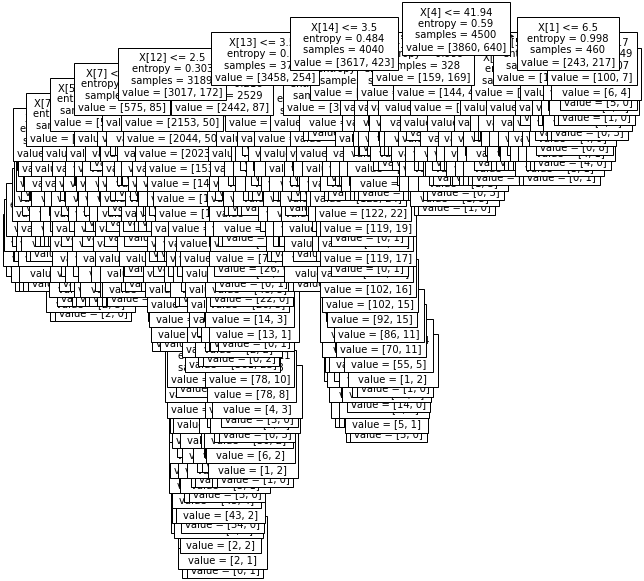

In [126]:
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(clf, fontsize=10)
plt.show()


To view the graph, open a browser and navigate to url:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;http://www.webgraphviz.com/

Copy and paste the text from the newly generated file in step 14, **tree.dot** that has been created in your working directory **C:\1264**, into the text area, to view the decision tree

**Major Step 4: Testing the classification model**

14. ❏ Apply the decision tree model to the test data.

In [146]:
actualResults = test[targetColumn]
predTest = clf.predict(test[predictorColumns])

15. ❏ Compare the vector of predicted class values to the actual class values.

In [154]:
from sklearn.metrics import confusion_matrix
conMat = confusion_matrix(actualResults, predTest)
conMat

array([[405,  28],
       [ 20,  47]], dtype=int64)

How accurate is the model when performed on the test data?

In [157]:
error_rate = (conMat[0][1] + conMat[1][0])/test.shape[0]
print(error_rate)

correct_rate = (conMat[0][-0] + conMat[1][1])/test.shape[0]
print(correct_rate)

0.904

What was the error rate?

## <center>**Congratulations! You have successfully built and tested a classification model to predict whether customers are going to churn.**</center>

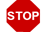

# <center>**This is the end of the exercise.**</center>